In [3]:
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


In [117]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# count = 0
def getPlot(maze, child, start, end):
    
     
    (x, y) = child.position
    maze[x][y] = 0.5

    H = np.array(maze)  # added some commas and array creation code

    
    fig = plt.figure(figsize=(6, 3.2))

    ax = fig.add_subplot(111)
#     ax.set_title('colorMap')

    print('Child: ', child.position)
    plt.imshow(H)
    ax.set_aspect('equal')

    cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.patch.set_alpha(0)
    cax.set_frame_on(False)
#     plt.colorbar(orientation='vertical')
    
    (x, y) = start
    ax.plot(x, y, 'o')
    
    (x, y) = end
    ax.plot(x, y, 'o')
    
#     global count
    
#     count = count + 1
#     imagename = 'image' + str(count)
#     plt.savefig(imagename, bbox_inches='tight')
    
    plt.show()

In [5]:
def euclideanDistance(x1, y1, x2, y2):
    return ((x1 - x2) ** 2) + ((y1 - y2) ** 2)

def manhattanDistance(x1, y1, x2, y2):
    return (abs(x1 - x2) + abs(y1 - y2))

def diagonalDistance(x1, y1, x2, y2):
    return (max(abs(x1 - x2), abs(y1 - y2)))

def noDistance(x1, y1, x2, y2):
    return 0

In [48]:
def astar(maze, start, end, hFunc):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    iterations = 1;
    
    while len(open_list) > 0:
        
        # to get iterations
        iterations +=1
        path = list()
        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return iterations, path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1

        ##############################################
        
            x1 = child.position[0]
            y1 = child.position[1]
            x2 = end_node.position[0]
            y2 = end_node.position[1]
            
            child.h = hFunc(x1, y1, x2, y2)
        
        ##############################################
        
            child.f = child.g + child.h


            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue
            
            # Add the child to the open list
            open_list.append(child)
            
            
            getPlot(maze, child, start, end)
    return iterations, path[::-1] # Return reversed path


In [126]:
import time

iter1, iter2, iter3, iter4, time1, time2, time3, time4 = 0, 0, 0, 0, 0, 0, 0, 0
path1, path2, path3, path4 = list(), list(), list(), list()




Child:  (0, 1)


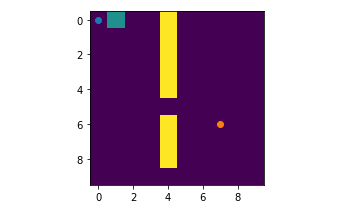

Child:  (1, 0)


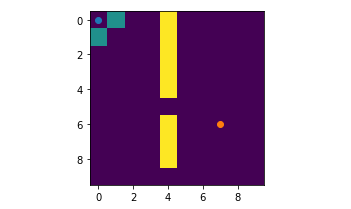

Child:  (1, 1)


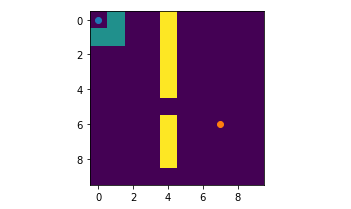

Child:  (1, 2)


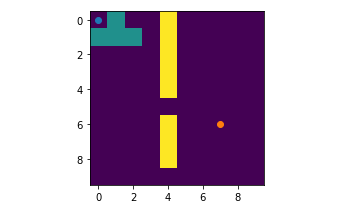

Child:  (2, 1)


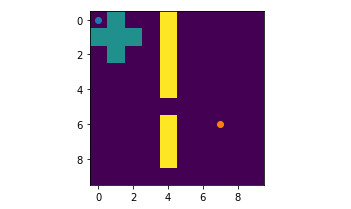

Child:  (0, 0)


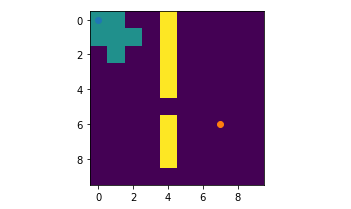

Child:  (0, 2)


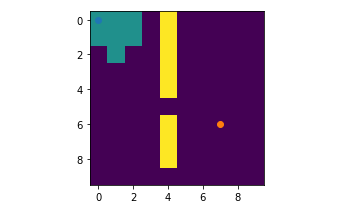

Child:  (2, 0)


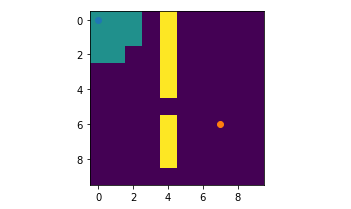

Child:  (2, 2)


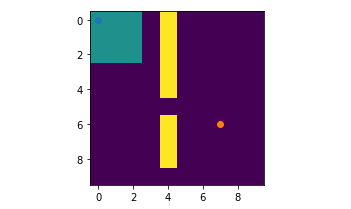

Child:  (2, 3)


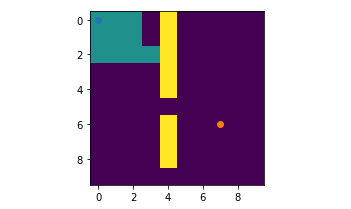

Child:  (3, 2)


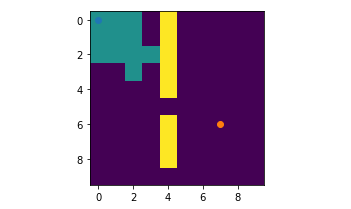

Child:  (1, 3)


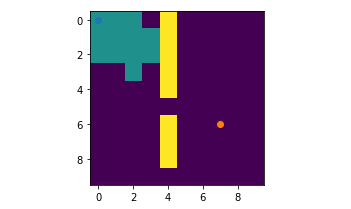

Child:  (3, 1)


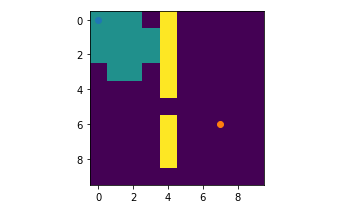

Child:  (3, 3)


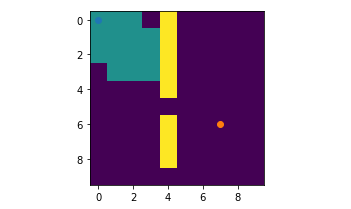

Child:  (4, 3)


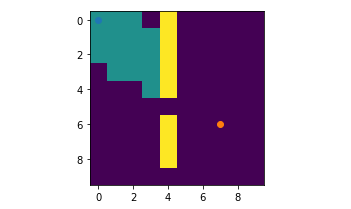

Child:  (4, 2)


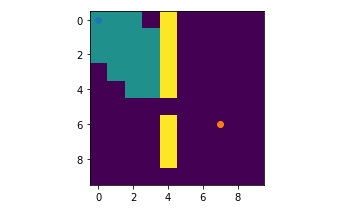

Child:  (5, 3)


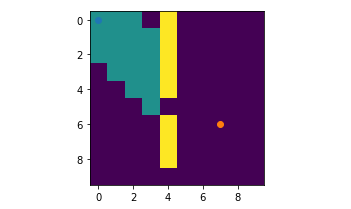

Child:  (5, 2)


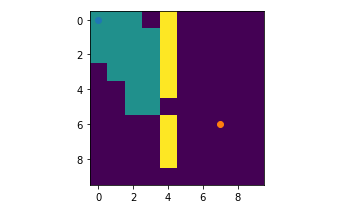

Child:  (5, 4)


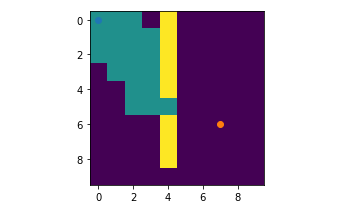

Child:  (5, 5)


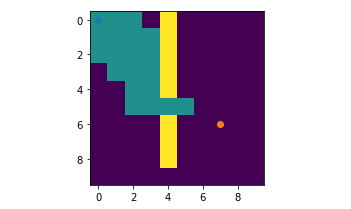

Child:  (4, 5)


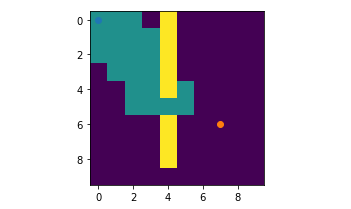

Child:  (6, 3)


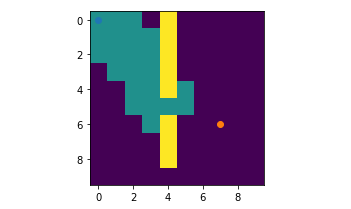

Child:  (6, 5)


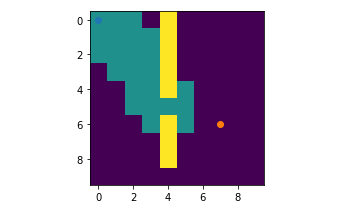

Child:  (6, 6)


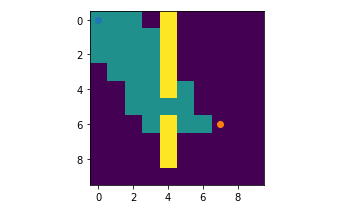

Child:  (7, 5)


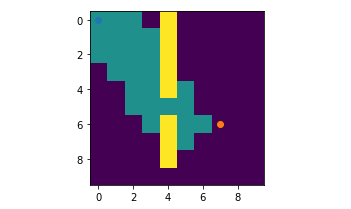

Child:  (5, 6)


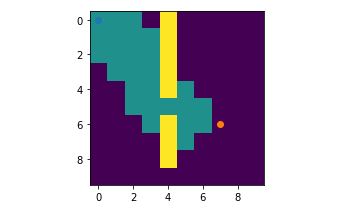

Child:  (7, 6)


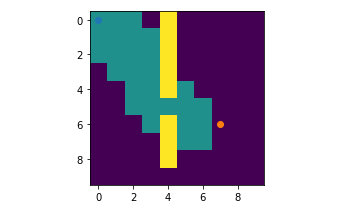

In [142]:
maze = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

start = (0, 0)
end = (7, 6)


start_time = time.time()

#     print("Using Euclidean Distance)
iter1, path1 = astar(maze, start, end, euclideanDistance)  

time1 = time.time() - start_time
time1 = time1*100



Child:  (0, 1)


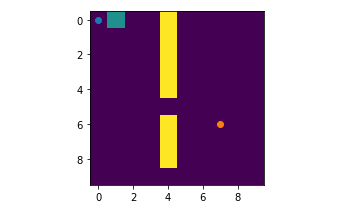

Child:  (1, 0)


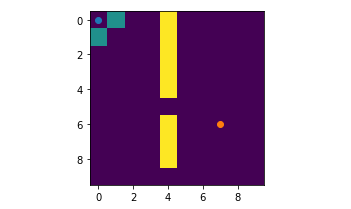

Child:  (1, 1)


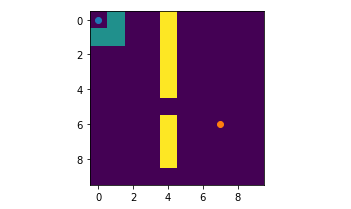

Child:  (1, 2)


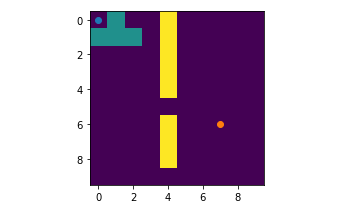

Child:  (2, 1)


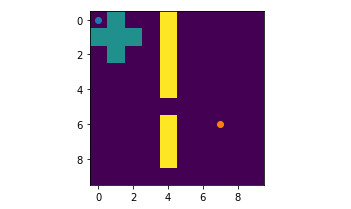

Child:  (0, 0)


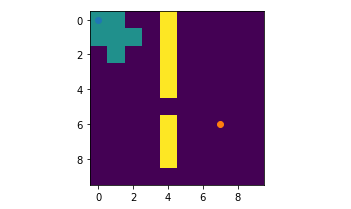

Child:  (0, 2)


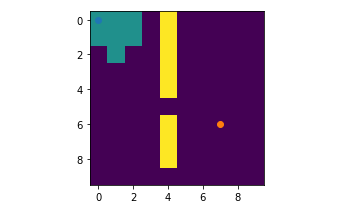

Child:  (2, 0)


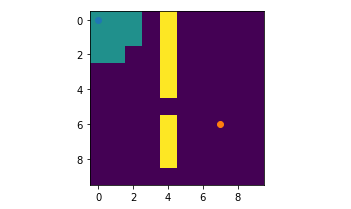

Child:  (2, 2)


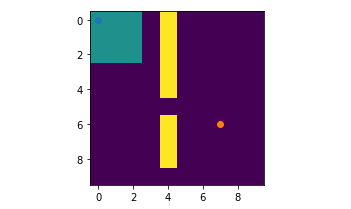

Child:  (2, 3)


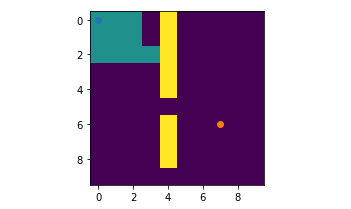

Child:  (3, 2)


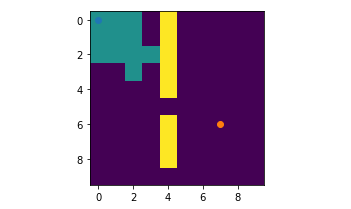

Child:  (1, 3)


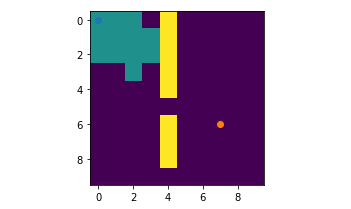

Child:  (3, 1)


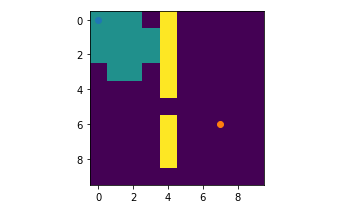

Child:  (3, 3)


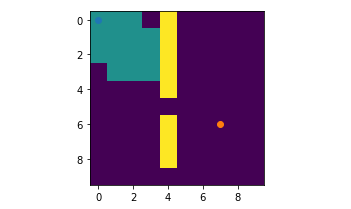

Child:  (4, 3)


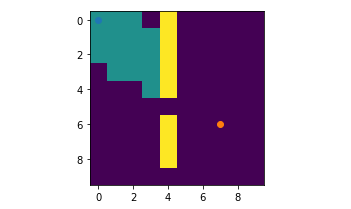

Child:  (4, 2)


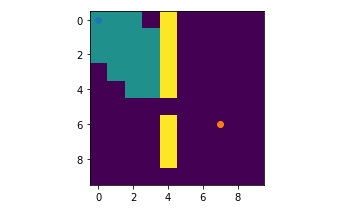

Child:  (5, 3)


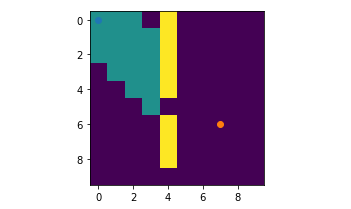

Child:  (5, 2)


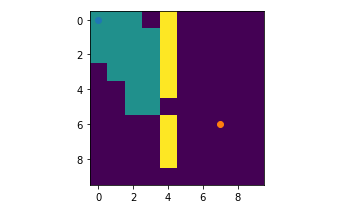

Child:  (5, 4)


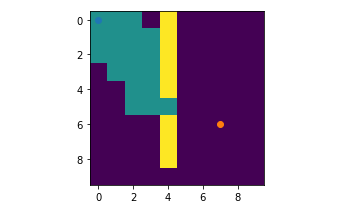

Child:  (5, 5)


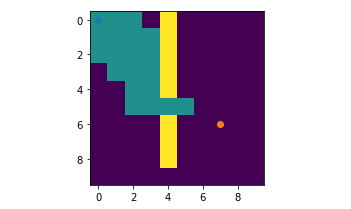

Child:  (4, 5)


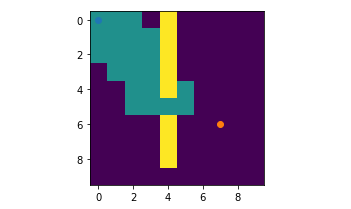

Child:  (6, 3)


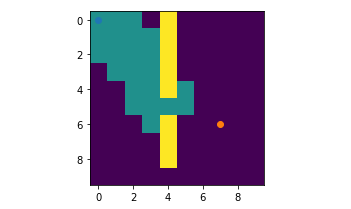

Child:  (6, 5)


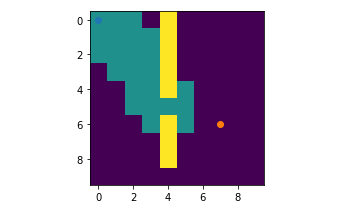

Child:  (6, 6)


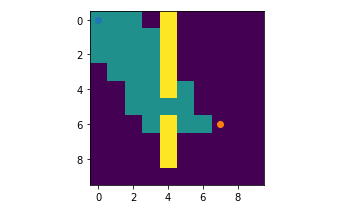

Child:  (7, 5)


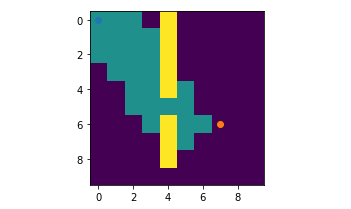

Child:  (5, 6)


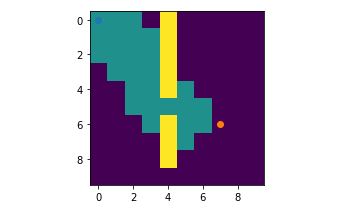

Child:  (7, 6)


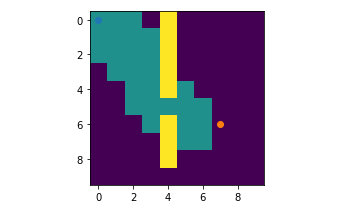

In [143]:
maze = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

start = (0, 0)
end = (7, 6)


start_time = time.time()

#     print("Using Manhattan Distance:")
iter2, path2 = astar(maze, start, end, manhattanDistance)
time2 = time.time() - start_time
time2 = time2*100


Child:  (0, 1)


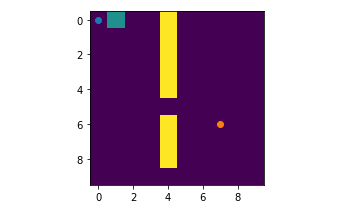

Child:  (1, 0)


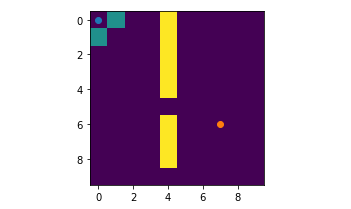

Child:  (1, 1)


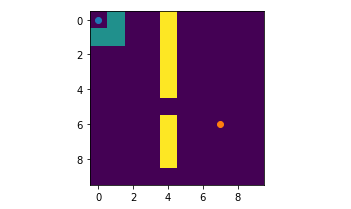

Child:  (0, 0)


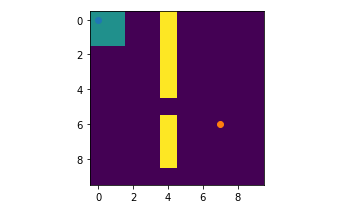

Child:  (2, 0)


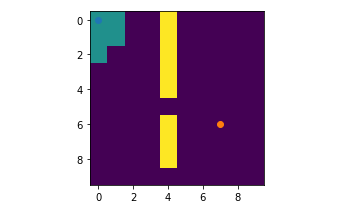

Child:  (2, 1)


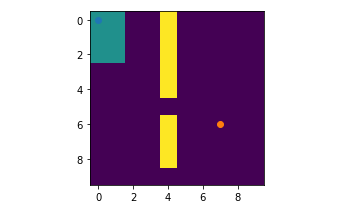

Child:  (1, 2)


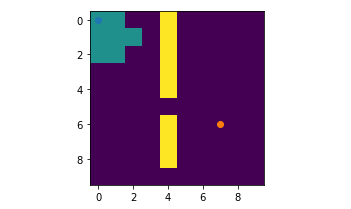

Child:  (0, 2)


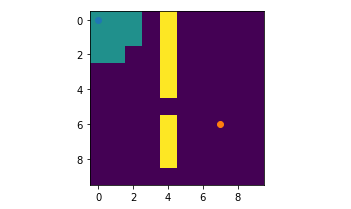

Child:  (2, 2)


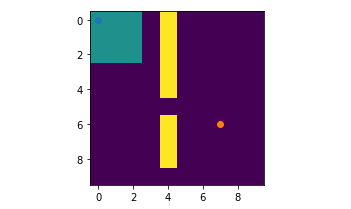

Child:  (3, 1)


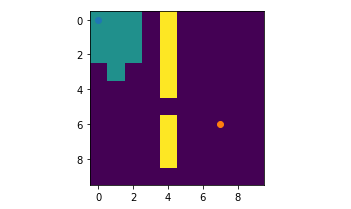

Child:  (3, 0)


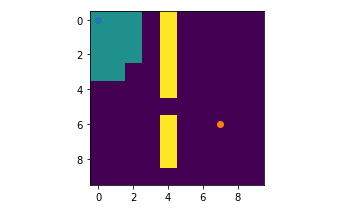

Child:  (3, 2)


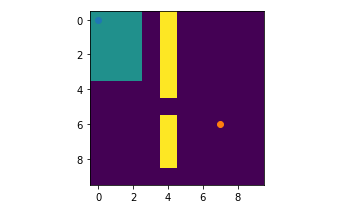

Child:  (2, 3)


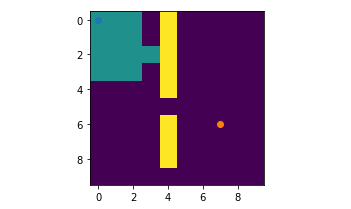

Child:  (1, 3)


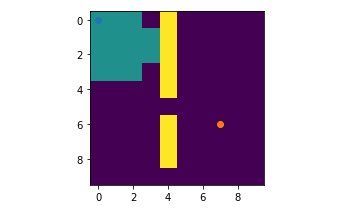

Child:  (3, 3)


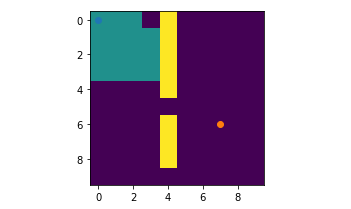

Child:  (4, 2)


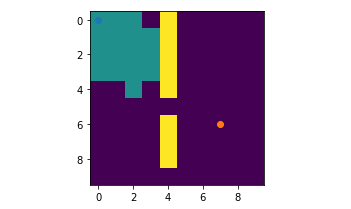

Child:  (4, 1)


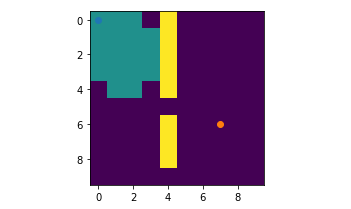

Child:  (4, 3)


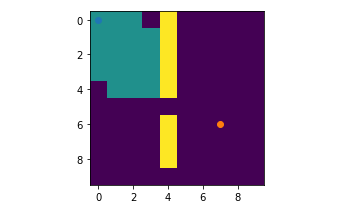

Child:  (5, 3)


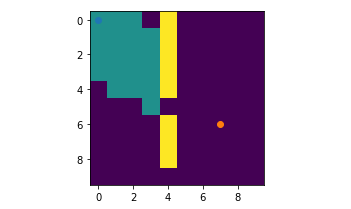

Child:  (5, 2)


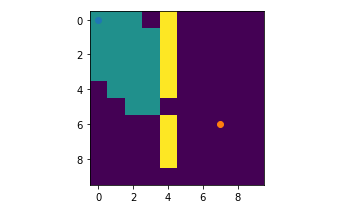

Child:  (5, 4)


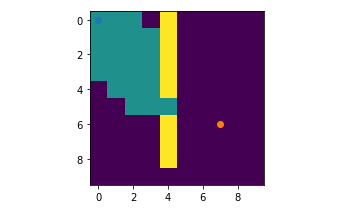

Child:  (5, 5)


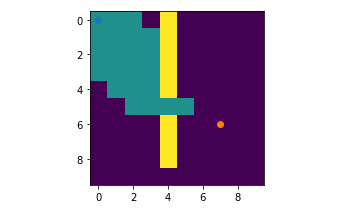

Child:  (4, 5)


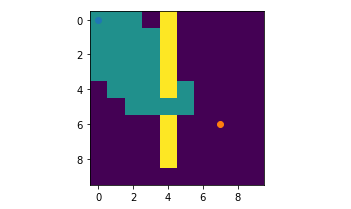

Child:  (6, 3)


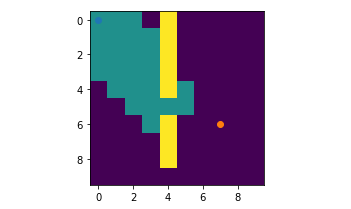

Child:  (6, 5)


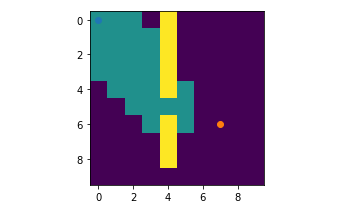

Child:  (6, 6)


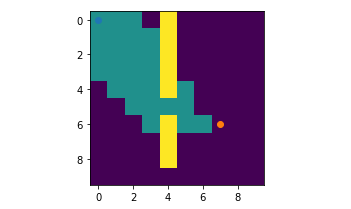

Child:  (7, 5)


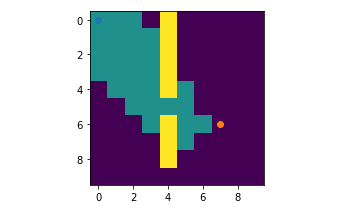

Child:  (5, 6)


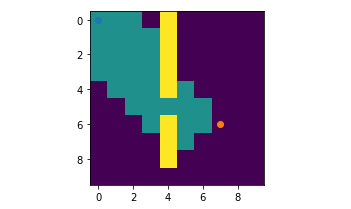

Child:  (7, 6)


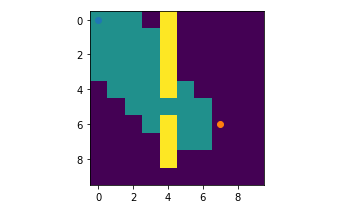

In [144]:
import time

maze = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

start = (0, 0)
end = (7, 6)


start_time = time.time()

#     print("Using Diagonal Distance:")
iter3, path3 = astar(maze, start, end, diagonalDistance)
time3 = time.time() - start_time
time3 = time3*100



In [145]:
    
print('Heuristic\tNo. of Iterations\tTime Taken(milliseconds)\t\tPath')
print('-------------------------------------------------------------------------------------------------------------')
print('Euclidean\t',iter1, '\t\t\t', "{0:.3f}".format(time1), '\t', path1)
print('Manhattan\t',iter2, '\t\t\t', "{0:.3f}".format(time2), '\t', path2)
print('Diagonal\t',iter3, '\t\t\t', "{0:.3f}".format(time3), '\t', path3)
# print('No Heuristic\t\t',iter4, '\t\t\t', "{0:.3f}".format(time4), '\t\t', path4)

print('-------------------------------------------------------------------------------------------------------------')




Heuristic	No. of Iterations	Time Taken(milliseconds)		Path
-------------------------------------------------------------------------------------------------------------
Euclidean	 9 			 364.089 	 [(0, 0), (1, 1), (2, 2), (3, 3), (4, 3), (5, 4), (6, 5), (7, 6)]
Manhattan	 9 			 391.035 	 [(0, 0), (1, 1), (2, 2), (3, 3), (4, 3), (5, 4), (6, 5), (7, 6)]
Diagonal	 12 			 375.586 	 [(0, 0), (1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6)]
-------------------------------------------------------------------------------------------------------------


In [57]:
# import time
    
# def main():

#     maze = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

#     start = (0, 0)
#     end = (7, 6)
    
    
#     start_time = time.time()
    
# #     print("Using Euclidean Distance)
#     iter1, path1 = astar(maze, start, end, euclideanDistance)  

#     time1 = time.time() - start_time
#     time1 = time1*100
   
    
#     start_time = time.time()
    
# #     print("Using Manhattan Distance:")
#     iter2, path2 = astar(maze, start, end, manhattanDistance)
#     time2 = time.time() - start_time
#     time2 = time2*100


    
#     start_time = time.time()
    
# #     print("Using Diagonal Distance:")
#     iter3, path3 = astar(maze, start, end, diagonalDistance)
#     time3 = time.time() - start_time
#     time3 = time3*100

    
#     start_time = time.time()

# # #     print("Using no heuristic:")
# #     iter4, path4 = astar(maze, start, end, noDistance)
# #     time4 = time.time() - start_time
# #     time4 = time3*100

    
#     print('Heuristic\tNumber of Iterations\tTime Taken(milliseconds)\t\tPath')
#     print('-------------------------------------------------------------------------------------------------------------')
#     print('Euclidean\t',iter1, '\t\t\t', "{0:.3f}".format(time1), '\t\t', path1)
#     print('Manhattan\t',iter2, '\t\t\t', "{0:.3f}".format(time2), '\t\t', path2)
#     print('Diagonal\t',iter3, '\t\t\t', "{0:.3f}".format(time3), '\t\t', path3)
# #     print('No Heuristic\t\t',iter4, '\t\t\t', "{0:.3f}".format(time4), '\t\t', path4)

#     print('-------------------------------------------------------------------------------------------------------------')




# if __name__ == '__main__':
#     main()
